# Company Financial/Stock Portfolio Analysis

As a data analyst at a small brokerage firm, the purpose of this notebook is to analyze financial data and stocks from the Wall Street Journal across various publically traded comapnies in order to help a specfic client with their personal stock portfolio. We will first start with the financial analysis of each of the provided companies by scraping data tables from the Wall Street Journal website and formatting them as Pandas DataFrames for further analysis. After the analysis of the Pandas Dataframes, we will create a data visualization to show sales growth across multiple companies over a five-year reporting period. Finally, we will analyze our client's individual stock portfolio further by scraping other useful information from the Wall Street Journal website. 

In order to format and analyze company financial information, we must import the NumPy and Pandas libraries to load information from the Wall Street Journal and prepare the dataframes for analysis. Matplotlib will be used to visualize the data while the Requests, RegEx, and BeautifulSoup libraries will be used to scrape additional information about the stocks in the client's portfolio. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup

## Company Financial Analysis:

First, we must establish the names of each company and the associated URLs and client shares to organize information for later reference. Sorting the companies alphabetically helps for organization in the event that more companies are added or subtracted.

In [2]:
# References each of the company stock tags alphabetically
company_tag = ['AAPL', 'AMZN', 'CVS', 'WMT', 'XOM']

# References each of the client's amount of shares per company in alphabetical order  
client_shares = [102, 10, 302, 206, 404]

# Company URLs ordered alphabetically to reference for all future uses
company_URLs = ['https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/AAPL.html', \
                'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/AMZN.html', \
                'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/CVS.html', \
                'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/WMT.html', \
                'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/XOM.html' ]

### Stock DataFrames

The data must first be loaded into dataframes from each of the individual URLs on the Wall Street Journal. The dataframes also need to be cleansed in order to remove any rows or columns that have blank or invalid values. The goal is for each of the dataframes to match the tables that are found in each of the URLs.

In [3]:
# Clean and manipulate the dataframe to match the tables on the Wall Street Journal website
def df_format(stock):
    # Use the first column as the index to sort through various financial measures
    stock.index = stock.iloc[:, 0]
    
    # Drop all rows and columns that do not contain any useful values
    stock.dropna(how='all', inplace=True) 
    stock.dropna(how='all', axis=1, inplace=True) 
    stock.fillna('-', inplace=True)
    stock = stock.iloc[:, 1:]
    stock = stock.loc[(stock != '-').any(axis=1)]
    return stock

In [4]:
# Reusable function to format dataframes for each individual company
def stock_df(stock_symbol):
    # For each condition, pass the df_format function to properly format each of the company dataframes
    if stock_symbol == 'AAPL':
        apple_df = pd.read_html(company_URLs[0], header=0)[0]
        return df_format(apple_df)
    elif stock_symbol == 'AMZN':
        amazon_df = pd.read_html(company_URLs[1], header=0)[0]
        return df_format(amazon_df)
    elif stock_symbol == 'CVS':
        cvs_df = pd.read_html(company_URLs[2], header=0)[0]
        return df_format(cvs_df)
    elif stock_symbol == 'WMT':
        walmart_df = pd.read_html(company_URLs[3], header=0)[0]
        return df_format(walmart_df)
    elif stock_symbol == 'XOM':
        exxon_df = pd.read_html(company_URLs[4], header=0)[0]
        return df_format(exxon_df)
    else:
        print("Please type in a valid stock symbol and try again")      

Apple Financials:

In [5]:
apple_df = stock_df('AAPL')
apple_df

,2021,2020,2019,2018,2017
Fiscal year is October-September. All values USD Millions.,,,,,
Sales/Revenue,365817,274150,259968,265809,228572
Sales Growth,33.44%,5.46%,-2.20%,16.29%,-
Cost of Goods Sold (COGS) incl. D&A,212981,170143,162264,163826,141702
COGS excluding D&A,201697,159087,150964,154526,132302
Depreciation & Amortization Expense,11284,11056,11300,9300,9400
Depreciation,11284,11056,11300,9300,8200
Amortization of Intangibles,-,-,-,-,1200
COGS Growth,25.18%,4.86%,-0.95%,15.61%,-
Gross Income,152836,104007,97704,101983,86870


Amazon Financials:

In [6]:
amazon_df = stock_df('AMZN')
amazon_df

,2021,2020,2019,2018,2017
Fiscal year is January-December. All values USD Millions.,,,,,
Sales/Revenue,469822,386064,280522,232887,177866
Sales Growth,21.70%,37.62%,20.45%,30.93%,-
Cost of Goods Sold (COGS) incl. D&A,272344,233307,165536,139156,111934
COGS excluding D&A,248923,216559,149821,126543,102737
Depreciation & Amortization Expense,23421,16748,15715,12613,9197
Depreciation,22909,16239,15150,12138,8831
Amortization of Intangibles,512,509,565,475,366
COGS Growth,16.73%,40.94%,18.96%,24.32%,-
Gross Income,197478,152757,114986,93731,65932


CVS Financials:

In [7]:
cvs_df = stock_df('CVS')
cvs_df

,2021,2020,2019,2018,2017
Fiscal year is January-December. All values USD Millions.,,,,,
Sales/Revenue,291935,268654,256577,194578,184786
Sales Growth,8.67%,4.71%,31.86%,5.30%,-
Cost of Goods Sold (COGS) incl. D&A,240063,219660,211248,163041,156258
COGS excluding D&A,235551,215219,206912,160341,153741
Depreciation & Amortization Expense,4512,4441,4336,2700,2517
Depreciation,2253,2100,1900,1700,1700
Amortization of Intangibles,2259,2341,2436,1000,817
COGS Growth,9.29%,3.98%,29.57%,4.34%,-
Gross Income,51872,48994,45329,31537,28528


Walmart Financials:

In [8]:
walmart_df = stock_df('WMT')
walmart_df

,2022,2021,2020,2019,2018
Fiscal year is February-January. All values USD Millions.,,,,,
Sales/Revenue,572754,559151,523964,514405,499909
Sales Growth,2.43%,6.72%,1.86%,2.90%,-
Cost of Goods Sold (COGS) incl. D&A,429000,420315,394605,385301,373396
COGS excluding D&A,418342,409163,383618,374623,362867
Depreciation & Amortization Expense,10658,11152,10987,10678,10529
Depreciation,10658,11152,10987,10678,10529
COGS Growth,2.07%,6.52%,2.41%,3.19%,-
Gross Income,143754,138836,129359,129104,126513
Gross Income Growth,3.54%,7.33%,0.20%,2.05%,-


Exxon Mobil Financials:

In [9]:
exxon_df = stock_df('XOM')
exxon_df

,2021,2020,2019,2018,2017
Fiscal year is January-December. All values USD Millions.,,,,,
Sales/Revenue,280510,178170,255995,279202,237156
Sales Growth,57.44%,-30.40%,-8.31%,17.73%,-
Cost of Goods Sold (COGS) incl. D&A,212908,146025,200973,212245,180485
COGS excluding D&A,192301,125316,182075,194200,162592
Depreciation & Amortization Expense,20607,20709,18898,18045,17893
Depreciation,20607,20709,18898,18045,17893
COGS Growth,45.80%,-27.34%,-5.31%,17.60%,-
Gross Income,67602,32145,55022,66957,56671
Gross Income Growth,110.30%,-41.58%,-17.82%,18.15%,-


### Company Highest Total Sales/Revenue Over Five-Year Reporting Period

Find the company with the highest total sales/revenue by evaluating and adding up each of the companies' sales across their five year reporting period.

In [10]:
# Used in case more companies are added or subtracted from the portfolio 
def company_sales(company_list):
    for number, company_df in enumerate(company_list):
        print(f'The total sales/revenue of {company_tag[number]} is ${company_df.loc["Sales/Revenue"].astype(float).sum():,.0f} million')   

# Visualize the sales for each company
company_sales([apple_df, amazon_df, cvs_df, walmart_df, exxon_df])

The total sales/revenue of AAPL is $1,394,316 million
The total sales/revenue of AMZN is $1,547,161 million
The total sales/revenue of CVS is $1,196,530 million
The total sales/revenue of WMT is $2,670,183 million
The total sales/revenue of XOM is $1,231,033 million


Using the information above:

In [11]:
print(f'Therefore, the company with the highest total sales/revenue over the five year reporting period is Walmart at ${stock_df("WMT").loc["Sales/Revenue"].astype(float).sum():,.0f} million.')

Therefore, the company with the highest total sales/revenue over the five year reporting period is Walmart at $2,670,183 million.


### Multiple Line Graph - Company Sales Growth Percentages Over Five Years

Create line graph for sales growth in percent over five years. Each corresponding line will be accompanied by a different color representing each of the different companies.

In [12]:
# Format the data to be used as floats within line graph
apple_line = apple_df.loc["Sales Growth"][0:4].str.rstrip('%').astype(float)
amazon_line = amazon_df.loc["Sales Growth"][0:4].str.rstrip('%').astype(float)
cvs_line = cvs_df.loc["Sales Growth"][0:4].str.rstrip('%').astype(float)
walmart_line = walmart_df.loc["Sales Growth"][0:4].str.rstrip('%').astype(float)
exxon_line = exxon_df.loc["Sales Growth"][0:4].str.rstrip('%').astype(float)

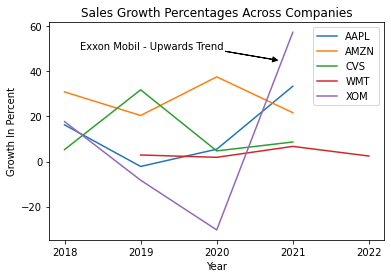

In [13]:
# Use line graph to plot individual lines with the growth percentage on the x-axis and year on the y-axis 
plt.plot(apple_line.index.astype(float), apple_line, label="AAPL")
plt.plot(amazon_line.index.astype(float), amazon_line, label="AMZN")
plt.plot(cvs_line.index.astype(float), cvs_line, label="CVS")
plt.plot(walmart_line.index.astype(float), walmart_line, label="WMT")
plt.plot(exxon_line.index.astype(float), exxon_line, label="XOM")

# Adjust visuals to make more sense of the trends
plt.annotate("Exxon Mobil - Upwards Trend", xy=(2020.8, 45), xytext=(2018.2, 50), arrowprops=dict(facecolor='black', width=0.2, headwidth=5, headlength=5)) 
plt.legend(loc='upper right')
plt.title("Sales Growth Percentages Across Companies")
plt.ylabel("Growth In Percent")
plt.xlabel("Year")
plt.xticks(np.arange(2018, 2023, 1))
plt.show()

#### Analysis:

Based on the data visualization above, I would recommend new clients to buy stock in Exxon Mobil as the company's sales is seemingly growing rapidly. The reason as to why Exxon Mobil is performing well in sales/revenue is likely due to global events that are causing oil prices to change in their favor as well as the fact that Americans are starting to travel more as COVID-19 pandemic restrictions are starting to be lifted. However, I would only reccomend Exxon Mobil in the short term as oil and gas companies tend to be very volatile and can shift depending on legislations and sanctions on oil and gas. The fact is hard to argue that Exxon Mobil stock has risen rapidly and has only been exacerbated by the events of the Russia/Ukraine war in early 2022.

## Stock Portfolio Analysis:

Now, we will analzye our individual client's stock portfolio by making HTTP requests to each of the company URLs and parsing the data using BeautifulSoup. We will then extract the text using the HTML tags to locate the required information for each of our client's needs. In order to create reusable code, we must employ good programming practices in order to ensure that the code can be applied to other client portfolios. We will start by creating a function that requests the inputted URL and parses the text using BeautifulSoup. Depending on the question which is labeled by number, we must input the proper paramter in order to search for the part of the text document that we are looking for. Question one finds the text value of the current stock price at 4:00pm close, question two finds the text value that shows if the stock price rose or dropped, and question three finds the fluctuation of the stock price in the 52-week range

In [14]:
# Requests and parses text to use for each question below
def wall_street_reader(company_tag, question_number):
    wall_street_url = 'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/' + str(company_tag) +'.html'
    wall_street_company = requests.get(wall_street_url)
    wall_street_company_soup = BeautifulSoup(wall_street_company.text, 'html.parser')
    if question_number == 1:
        company_value = wall_street_company_soup.find(name='span', class_="cr_num cr_curr_price").text
        return company_value
    if question_number == 2:
        after_hours = wall_street_company_soup.find(name='span', id="ms_quote_change").text
        return after_hours
    if question_number == 3:
        fluctuation_range = wall_street_company_soup.find_all(name='span', class_ = "data_data")[4].text
        return fluctuation_range

### Question 1 - Total Value of Client's Portfolio

In [15]:
# Calculate the sum of all shares in the portfolio
def calculate_portfolio_value(company_values, client_shares):
    # Accumulator to add up all of the stock portfolio values
    total_value = 0
    
    # Multiply shares by the stock price to find the value for each element of the portfolio
    for value, share in zip(company_values, client_shares):
        value = float(value.strip('$').replace(',', ''))
        value = value * share
        total_value += value
    print(f'The total value of the clients portfolio at 4:00pm close across all stocks is ${total_value:,.2f}')

calculate_portfolio_value([wall_street_reader(company_tag[0], 1), \
                           wall_street_reader(company_tag[1], 1), \
                           wall_street_reader(company_tag[2], 1), \
                           wall_street_reader(company_tag[3], 1), \
                           wall_street_reader(company_tag[4], 1)], client_shares)
                           

The total value of the clients portfolio at 4:00pm close across all stocks is $146,354.04


-------------------

### Question 2 - Decrease In Client's Stock Value After Hours

In [16]:
# Add up the amount of percentages that are negative
def negative_value(after_hour_values):
    # Accumulator to add up negative values
    negative_counter = 0
    
    # Find every instance where there is a '-' character to count the negative values
    for company in after_hour_values:
        if '-' in company:
            negative_counter += 1
    return print(f'{negative_counter} of the client\'s stocks saw a decrease in value after hours' )

negative_value([wall_street_reader(company_tag[0], 2), \
                 wall_street_reader(company_tag[1], 2), \
                 wall_street_reader(company_tag[2], 2), \
                 wall_street_reader(company_tag[3], 2), \
                 wall_street_reader(company_tag[4], 2)])

3 of the client's stocks saw a decrease in value after hours


------------------------------------------------------------------------------------------------------------

### Question 3 - Stock With Highest Fluctuation Across 52-Week Range

In [17]:
# Determine the net change in stock prices across 52-week period
def fluctuation_calculation(company_fluctuation):
    value1 = float(company_fluctuation.split('-')[0].replace(',', ''))
    value2 = float(company_fluctuation.split('-')[1].replace(',', ''))
    abs_value = abs(value1 - value2)
    return abs_value

In [18]:
# Output to visualize each of the company net change in stock price 
for index in range(5):
    print(f'{company_tag[index]} stock had a fluctuation of ${fluctuation_calculation(wall_street_reader(company_tag[index], 3)):.2f} over the stock\'s 52-week range')

AAPL stock had a fluctuation of $60.69 over the stock's 52-week range
AMZN stock had a fluctuation of $1101.63 over the stock's 52-week range
CVS stock had a fluctuation of $36.61 over the stock's 52-week range
WMT stock had a fluctuation of $26.40 over the stock's 52-week range
XOM stock had a fluctuation of $39.40 over the stock's 52-week range


Using the information above:

In [19]:
print(f'Therefore, {company_tag[1]} stock had the highest fluctuaton in the stock\'s 52-week range at a net change of ${fluctuation_calculation(wall_street_reader(company_tag[1], 3)):.2f}')

Therefore, AMZN stock had the highest fluctuaton in the stock's 52-week range at a net change of $1101.63


---------------------------------------------------------------------------------------------------------